<a href="https://colab.research.google.com/github/adrianglez77/Practica2-FSI/blob/master/Copia_de_Practica2vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


'LEGO brick images'   Sign-Language


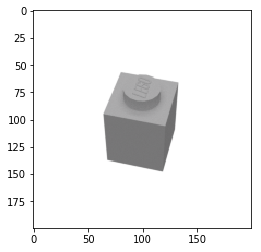

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/datasets"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasetcompleto/LEGO brick images/train/3005 Brick 1x1/0001.png', 'r')
imshow(np.asarray(pil_im))


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time
from keras.applications import vgg16


# DATA SOURCE --------------------------------------------------

#conjunto de entrenamiento y conjunto de validacion
train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasetcompleto/LEGO brick images/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasetcompleto/LEGO brick images/valid'

#ImageDataGenerator -> nos genera mas imagenes artificialmente -> le damos la vuelta, zoom, la movemos,etc.
train_datagen = ImageDataGenerator(rescale=1./255)

#otro ImageDataGenerator para los elementos de datos
test_datagen = ImageDataGenerator(rescale=1./255)

#el directorio donde estan las imagenes, tamaño final, modo de clase categorica(binario (1 neurona d esalida), categorico(2 o mas))
#batch_size es el numero de muestras que tiene que pasar para que entrene
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------
#vamos a incluir una red neuronal densa al final con el parámetro include_top
#no cargamos ningun modelo entrenado,ningun tensor
#150x150 en RGB, ,numero de clases
model = vgg16.VGG16(include_top=True, weights=None,
                   input_tensor=None, input_shape=(150,150,3),
                   pooling=None, classes=16)
#función de optimización stochactic gradient descent, 
#la función de pérdida categorical cross entropy y, para las métricas, accuracy
vgg16_model = model
vgg16_model.compile(loss='categorical_crossentropy',optimizer='sgd',
                   metrics=['accuracy'])

# TRAINING --------------------------------------------------

vgg16 = vgg16_model.fit_generator(
        train_generator,
        steps_per_epoch=200,
        epochs=20, 
        validation_data=validation_generator,
        validation_steps=57,
        #verbose=2
) 

Found 6379 images belonging to 16 classes.
Found 1834 images belonging to 16 classes.
Epoch 1/20
200/200 [==============================] - 1840s 9s/step - loss: 2.7711 - acc: 0.1065 - val_loss: 2.7691 - val_acc: 0.2686
Epoch 2/20
200/200 [==============================] - 53s 267ms/step - loss: 2.7662 - acc: 0.1905 - val_loss: 2.7607 - val_acc: 0.3191
Epoch 3/20
200/200 [==============================] - 52s 260ms/step - loss: 2.7287 - acc: 0.2681 - val_loss: 2.4918 - val_acc: 0.2231
Epoch 4/20
200/200 [==============================] - 52s 260ms/step - loss: 1.7405 - acc: 0.3879 - val_loss: 1.4527 - val_acc: 0.4684
Epoch 5/20
200/200 [==============================] - 52s 259ms/step - loss: 0.9772 - acc: 0.6296 - val_loss: 1.1567 - val_acc: 0.5699
Epoch 6/20
200/200 [==============================] - 52s 260ms/step - loss: 0.7154 - acc: 0.7346 - val_loss: 1.0954 - val_acc: 0.6670
Epoch 7/20
200/200 [==============================] - 52s 260ms/step - loss: 0.5529 - acc: 0.7924 - val_l

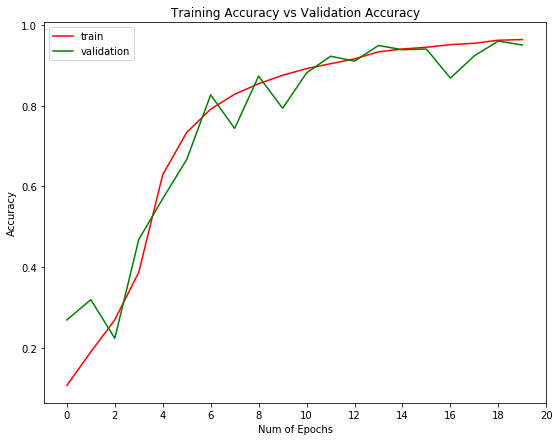

In [0]:

import matplotlib.pyplot as plt

plt.figure()  
plt.plot(vgg16.history['acc'],'r')  
plt.plot(vgg16.history['val_acc'],'g')  
plt.xticks(np.arange(0, 21, 2.0))  
plt.rcParams['figure.figsize'] = (9, 7)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.show() 

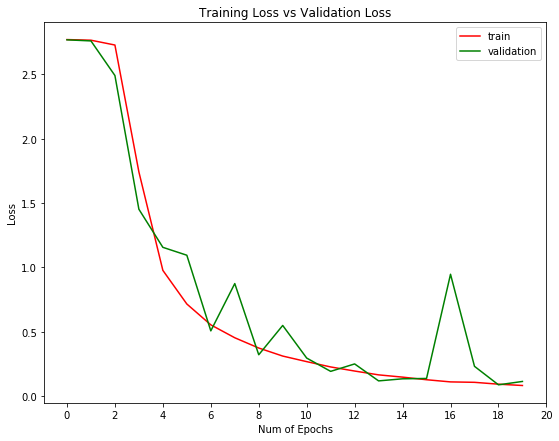

In [0]:
plt.figure(1)  
plt.plot(vgg16.history['loss'],'r')  
plt.plot(vgg16.history['val_loss'],'g')  
plt.xticks(np.arange(0, 21, 2.0))  
plt.rcParams['figure.figsize'] = (9, 7)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  

In [0]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________